# SLR- salary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
Salary=pd.read_csv('Salary_Data.csv')
Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
Salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
Salary.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [6]:
Salary1=Salary.rename({'YearsExperience':'years_experience', 'Salary':'salary'},axis=1)
Salary1

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# correlation

In [7]:
Salary1.corr()

,years_experience,salary
years_experience,1.000000,0.978242
salary,0.978242,1.000000


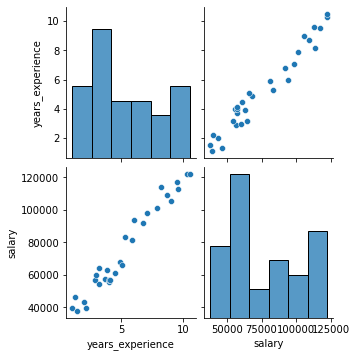

In [8]:
sns.pairplot(Salary1.iloc[:,0:2])

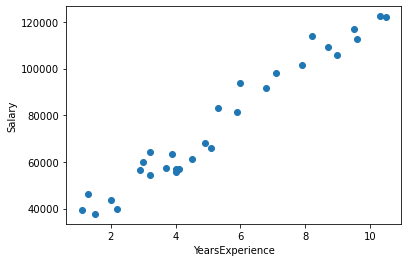

In [9]:
plt.scatter(x = Salary1['years_experience'], y = Salary1['salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

C:\Users\AANANTHA PRIYA S M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='years_experience', ylabel='Density'>

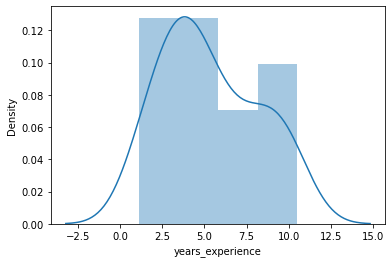

In [10]:
sns.distplot(Salary1['years_experience'])

C:\Users\AANANTHA PRIYA S M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

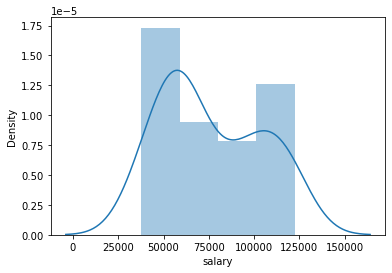

In [11]:
sns.distplot(Salary1['salary'])

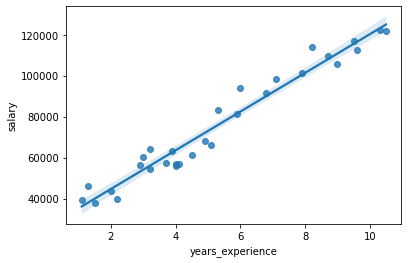

In [12]:
sns.regplot(x="years_experience",y="salary",data=Salary1);

# Model building and Testing

In [27]:
#Fit OLS model
model=smf.ols("salary~years_experience",data=Salary1).fit()

salary is the dependent variable and year is a independent variable

In [28]:
model.params

Intercept           25792.200199
years_experience     9449.962321
dtype: float64

paramas['Intercept'] will give the estimated intercept coefficient, and params['salary'] will give the estimated slope coefficients.

In [29]:
#summary of regression result
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.14e-20
Time:                        12:04:06   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years_experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The F-statistic is large enough (i.e., if the explained variance is much larger than the unexplained variance), then we can reject the null hypothesis and conclude that at least one of the independent variables has a significant effect on the dependent variable.

# t and pvalue

In [30]:
print(model.tvalues, '\n', model.pvalues)

Intercept           11.346940
years_experience    24.950094
dtype: float64 
 Intercept           5.511950e-12
years_experience    1.143068e-20
dtype: float64


# Square root transformation
#### Square root transformation is a type of data transformation that can be used to normalize data that have a right-skewed distribution. 

In [31]:
model = smf.ols('np.sqrt(salary)~np.sqrt(years_experience)', data = Salary1).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 03 May 2023   Prob (F-statistic):           7.58e-19
Time:                        12:04:12   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(years_experience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cube root transformation
#### Cube root transformation is a type of data transformation that can be used to normalize data that have a highly skewed distribution with positive values. 

In [33]:
model1 = smf.ols('np.cbrt(salary)~np.cbrt(years_experience)', data = Salary1).fit()

In [34]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Wed, 03 May 2023   Prob (F-statistic):           6.37e-18
Time:                        12:04:15   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(years_experience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation 
#### Log transformation is a type of data transformation that can be used to normalize data that have a right-skewed distribution. It involves taking the logarithm of each observation in the data. 

In [35]:
model2 = smf.ols('np.log(salary)~np.log(years_experience)', data = Salary1).fit()

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 03 May 2023   Prob (F-statistic):           7.40e-16
Time:                        12:04:17   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.3280      0.056    184.868      0.000      10.214      10.442
np.log(years_experience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Predictions

In [37]:
newdata=pd.Series([5,10])

In [38]:
data_pred=pd.DataFrame(newdata,columns=['years_experience'])

In [39]:
data_pred

,years_experience
0,5
1,10


In [40]:
model.predict(data_pred)

0    272.674991
1    342.721388
dtype: float64